In [138]:
import json
import pprint
import collections
import requests
import pandas as pd
import numpy as np
import gensim

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from matplotlib import pyplot as plt

import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore

In [142]:
def csv_to_docs(path):
    all_data = pd.read_csv(path, index_col=0)
    all_data = all_data.fillna('')
#     all_blocks = []
#     for col in all_data:
#         blocks = all_data[col].unique()
#         all_blocks.extend(blocks)
#     block_vocab = list(set(all_blocks))
    all_block_docs = all_data.values.tolist()
    return all_block_docs

In [143]:
full_docs = csv_to_docs('data/sequence-data/1000-trial-terminals-full.csv')

In [144]:
category_docs = csv_to_docs('data/sequence-data/1000-trial-terminals-categories.csv')

# RNN

In [154]:
from numpy import array
from numpy import cumsum
import tensorflow as tf

## Prep

You have the data in "raw" sequence form, now you have to decide on a window/fixed vector (or eventually use an auto encoder or something)

For now, create windowed sequences based on the median path length / 2 - 1
predict the next token in the sequence


some other ideas - what are some unsupervised things you can do on this data?
what about tf-idf and then clustering? what kinds of "archtetypal" stacks will you see?

# Word2Vec trial

In [146]:
# Global hyper parameters
hp = {
    "size": 150, # size of the one-hot-encoded word vectors
    "window": 5, # context size
    "min_count": 2,
    "workers": 4,
    "iter": 50
}

In [147]:
model = gensim.models.Word2Vec(
        full_docs,
        size=hp["size"],
        window=hp["window"],
        min_count=hp["min_count"],
        workers=hp["workers"])

INFO : collecting all words and their counts
INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO : PROGRESS: at sentence #10000, processed 330000 words, keeping 110 word types
INFO : PROGRESS: at sentence #20000, processed 660000 words, keeping 115 word types
INFO : PROGRESS: at sentence #30000, processed 990000 words, keeping 118 word types
INFO : PROGRESS: at sentence #40000, processed 1320000 words, keeping 120 word types
INFO : PROGRESS: at sentence #50000, processed 1650000 words, keeping 125 word types
INFO : PROGRESS: at sentence #60000, processed 1980000 words, keeping 126 word types
INFO : PROGRESS: at sentence #70000, processed 2310000 words, keeping 126 word types
INFO : PROGRESS: at sentence #80000, processed 2640000 words, keeping 134 word types
INFO : PROGRESS: at sentence #90000, processed 2970000 words, keeping 135 word types
INFO : PROGRESS: at sentence #100000, processed 3300000 words, keeping 136 word types
INFO : collected 136 word types fr

In [148]:
def find_similar_to(word):
    return [w for w in model.wv.most_similar(positive=[word])]

In [153]:
find_similar_to('>')

[('control_if', 0.632203221321106),
 ('data_setvariableto', 0.6196610331535339),
 ('procedures_definition', 0.604922890663147),
 ('-', 0.5868330001831055),
 ('control_if_else', 0.5824877619743347),
 ('control_start_as_clone', 0.5280444622039795),
 ('data_changevariableby', 0.5262773633003235),
 ('procedures_call', 0.48418986797332764),
 ('event_whenbroadcastreceived', 0.4734700918197632),
 ('motion_changexby', 0.35424548387527466)]

In [150]:
X = model[model.wv.vocab]

/Users/tylerangert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [133]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

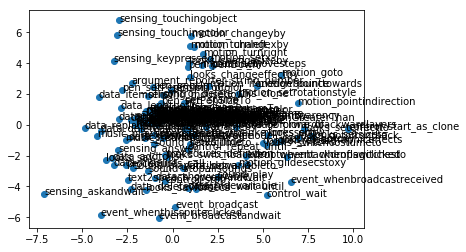

<Figure size 640x480 with 0 Axes>

In [134]:
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
fig.savefig('test2png.png', dpi=100)
plt.show()

In [135]:
list(model.wv.vocab.keys())

['event_whenflagclicked',
 '-',
 'data_setvariableto',
 'looks_hide',
 '',
 'event_whenkeypressed',
 'motion_pointindirection',
 'motion_movesteps',
 'looks_switchcostumeto',
 'motion_gotoxy',
 'looks_show',
 'control_forever',
 '>',
 'control_if',
 'sensing_touchingobject',
 'looks_sayforsecs',
 'data_changevariableby',
 'looks_switchbackdropto',
 'event_whenbackdropswitchesto',
 'motion_glidesecstoxy',
 'motion_turnright',
 'data_showvariable',
 'data_hidevariable',
 'control_stop',
 'control_repeat_until',
 'control_wait',
 'control_repeat',
 'control_wait_until',
 'event_whenthisspriteclicked',
 'sensing_askandwait',
 'procedures_call',
 'sensing_answer',
 'procedures_definition',
 'data_addtolist',
 'data_deleteoflist',
 'data_itemoflist',
 'data_deletealloflist',
 'control_if_else',
 'event_whenbroadcastreceived',
 'looks_nextcostume',
 'event_broadcast',
 'looks_gotofrontback',
 'motion_goto',
 'motion_sety',
 'looks_seteffectto',
 'control_create_clone_of',
 'control_start_as_c

In [137]:
model.most_similar(positive=['motion_goto', '-'], negative=['control_repeat'], topn=10)

/Users/tylerangert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('motion_gotoxy', 0.4965013265609741),
 ('control_start_as_clone', 0.48308229446411133),
 ('>', 0.4741712808609009),
 ('motion_setx', 0.428862065076828),
 ('motion_setrotationstyle', 0.3940887749195099),
 ('looks_goforwardbackwardlayers', 0.390641987323761),
 ('event_whenbroadcastreceived', 0.3738231062889099),
 ('motion_sety', 0.3721809685230255),
 ('motion_pointtowards', 0.3355463743209839),
 ('motion_movesteps', 0.3192392885684967)]